<a href="https://colab.research.google.com/github/Utsav-27/DL-Assignments/blob/main/Classification_task_latex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning programming II: Classification
Felix Wiewel, Institute of Signal Processing and System Theory, University of Stuttgart, 09.02.2021

## GPU support
In order to speed up calculations with Tensorflow, we need to change the runtime type of this notebook to GPU. For this click on "Runtime" in the top left menu and select "Change runtime type". Then choose "GPU" in the drop down list under "Hardware accelerator". This will enable tensorflow to execute calculations on a GPU provided by Google Colab.

## Implementation
We can simply import all required packages and load some data set using Keras.

In [1]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
import matplotlib.pyplot as plt

# Define constants
batch_size = 128
epochs = 20
learning_rate = 0.001

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = np.expand_dims(x_train_mnist, axis=-1).astype(np.float32)
x_test_mnist = np.expand_dims(x_test_mnist, axis=-1).astype(np.float32)

11490434/11490434 [==============================] - 2s 0us/step


We can also plot some examples in order to get an impresion of what the data looks like.

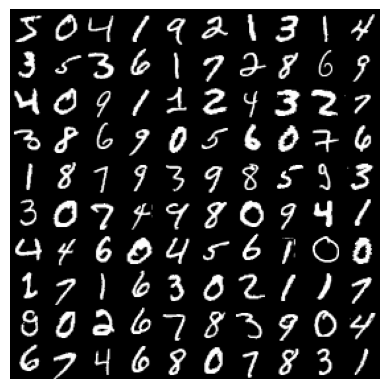

In [2]:
plt_img = np.zeros((280, 280))
for i in range(10):
  for j in range(10):
    plt_img[i*28:(i+1)*28, j*28:(j+1)*28] = np.squeeze(x_train_mnist[i*10+j])
plt.imshow(plt_img, cmap="gray")
plt.axis("off")
plt.show()

Similar to the previous exercises we again derive a class for our model from the Keras Model class.

In [3]:
from keras.api._v2.keras import activations
""" Define a small convolutional network for classification with two conv. and 3 dense layers. The conv. layers should have 8/16 filters a kernel size of 3x3 and a stride of 2. The dense layers should have 128/64/?
neurons. Choose the activation functions of the layers accordingly."""

class MyModel(k.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Layer definition
        self.conv0 = k.layers.Conv2D(8,3,2, activation='relu')
        self.conv1 = k.layers.Conv2D(16,3,2,activation='relu')
        self.flatten = k.layers.Flatten()
        self.dense0 = k.layers.Dense(128, activation='relu')
        self.dense1 = k.layers.Dense(64, activation = 'relu')
        self.dense2 = k.layers.Dense(10, activation='softmax')


    def call(self, inputs, training=False):
        # Call layers appropriately to implement a forward pass
        output = self.conv0(inputs)
        output = self.conv1(output)
        output = self.flatten(output)
        output = self.dense0(output)
        output = self.dense1(output)
        output = self.dense2(output)
        return output

We can now instanciate an object of this class and compile it using the the cross-entropy loss function.

In [4]:
""" Instantiate an object of MyModel and an RMSprop optimizer with learning rate given by the constant "learning_rate". Compile the model with a suitable loss function and add accuracy as a metric. """

mdl = MyModel()
opt = tf.optimizers.RMSprop(learning_rate)
mdl.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',  metrics=["accuracy"])

Now we are ready to train the model and log the metrics for plotting.

In [5]:
""" Train the model mdl on the training data with a batch size of "batch_size" for "epochs" epochs. Train with 10% of the training data as validation data. """
history_no_dropout = mdl.fit(x_train_mnist,y_train_mnist, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 20s 7ms/step - loss: 0.6532 - accuracy: 0.8816 - val_loss: 0.1360 - val_accuracy: 0.9613
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9689 - val_loss: 0.0896 - val_accuracy: 0.9750
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0639 - accuracy: 0.9815 - val_loss: 0.0859 - val_accuracy: 0.9777
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0745 - val_accuracy: 0.9817
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0859 - val_accuracy: 0.9795
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0804 - val_accuracy: 0.9828
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0928 - val_accuracy: 0.9787
Epoch

Visualizing the training process in a plot is possible by using the history object that contains a history dictionary. This is returned from the fit function and contains all the metrics logged over the training proces.

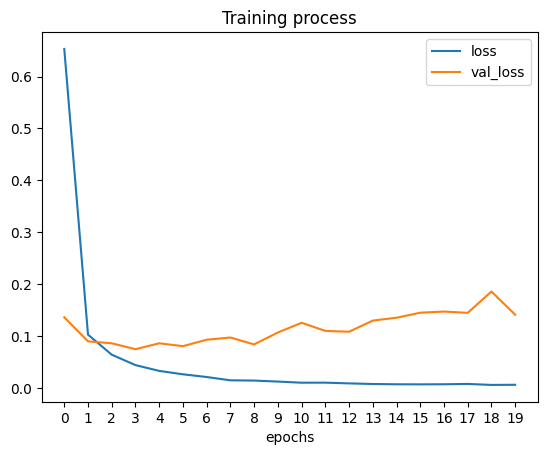

In [6]:
plt.plot(history_no_dropout.history["loss"])
plt.plot(history_no_dropout.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.xticks(range(epochs))
plt.xlabel("epochs")
plt.title("Training process")
plt.show()

As you can see, the model is clearly overfitting. The loss on the training data is decreasing further and further with every epoch, while the loss on the validation data rises at the same time. We can avoid this by using dropout, which is a strong regularization that you should be familiar with from the lecture. For this we define a new model that has an additional dropout layer with a drop probability of $0.25$ before the first fully connected layer. Otherwise this model is the same as the model above.

In [7]:
""" Create a new model, which is identical to MyModel execpt for a dropout layer between the conv. and dense layers. As a dropout rate use 0.25 """

class MyDropoutModel(k.Model):
    def __init__(self):
        super(MyDropoutModel, self).__init__()
        # Layer definition
        self.conv0 = k.layers.Conv2D(8,3,2, activation='relu')
        self.conv1 = k.layers.Conv2D(16,3,2,activation='relu')
        self.flatten = k.layers.Flatten()
        self.dropout = k.layers.Dropout(0.25)
        self.dense0 = k.layers.Dense(128, activation='relu')
        self.dense1 = k.layers.Dense(64, activation = 'relu')
        self.dense2 = k.layers.Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        # Call layers appropriately in order to implement the forward pass
        output = self.conv0(inputs)
        output = self.conv1(output)
        output = self.flatten(output)
        output = self.dropout(output)
        output = self.dense0(output)
        output = self.dense1(output)
        output = self.dense2(output)
        return output

We can now create an instance of this model, train it and visualize the training process.

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.5862 - accuracy: 0.8439 - val_loss: 0.1122 - val_accuracy: 0.9668
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1575 - accuracy: 0.9519 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1127 - accuracy: 0.9646 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9723 - val_loss: 0.0707 - val_accuracy: 0.9808
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0610 - val_accuracy: 0.9837
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0613 - val_accuracy: 0.9847
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0548 - val_accuracy: 0.9850
Epoch 

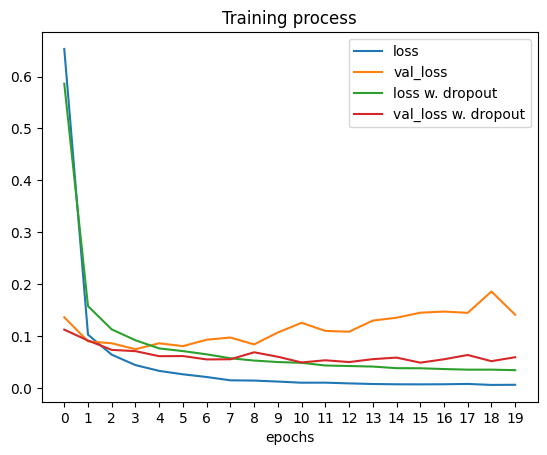

In [8]:
""" Instantiate a MyDropoutModel object, compile and train it on the training data. Use the same optimizer and parameters for training as before. """

dropout_mdl = MyDropoutModel()
dropout_opt = tf.optimizers.RMSprop(learning_rate)
dropout_mdl.compile(optimizer = dropout_opt, loss = 'sparse_categorical_crossentropy',  metrics=["accuracy"])

history_dropout = dropout_mdl.fit(x_train_mnist,y_train_mnist, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history_no_dropout.history["loss"])
plt.plot(history_no_dropout.history["val_loss"])
plt.plot(history_dropout.history["loss"])
plt.plot(history_dropout.history["val_loss"])
plt.legend(["loss", "val_loss", "loss w. dropout", "val_loss w. dropout"])
plt.xticks(range(epochs))
plt.xlabel("epochs")
plt.title("Training process")
plt.show()

While the model without dropout can reach a much lower loss on the training data, it generalizes very poorly to the unseen validation data. The model with dropout however generalizes quite good to the validation data and achieves a similar loss on both the data used during training and unseen data. This demonstrates that using dropout can be a good way to regularize your networks and prevent overfitting. Although dropout helps to prevent overfitting very well, it introduces another hyperparameter, the drop probability, that needs to be optimized. Common values for this hyperparameter are on the interval $\left[0.2,0.5\right]$.

## Transfer Learning
In this exercise, we will also use a neural network pretrained on ImageNet in order to fine tune it for the [Caltech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) data set. For a guide on transfer learning using fine tuning with Keras click [here](https://www.tensorflow.org/beta/tutorials/images/transfer_learning).

In order to do this we first need to download an extract the data set. Note that there is a wide collection of data sets available through the [tensorflow_datasets](https://www.tensorflow.org/datasets) package including Caltech101. But for demonstration purposses we manually download and load the images using Keras.

In [9]:
!gdown https://drive.google.com/u/0/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&export=download
!tar -xzf 101_ObjectCategories.tar.gz

Downloading...
From: https://drive.google.com/u/0/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
To: /content/101_ObjectCategories.tar.gz
100% 132M/132M [00:07<00:00, 18.4MB/s]


In order to feed our model with the data, we will use the ImageDataGenerator class provided by Keras. This class can be used for reading files from a structured directory, create the labels based on the structure of the directory and apply data augmentation techniques. The ImageDataGenerator already supports a lot of techniques for data augmentation. In our example, we use a random rotation, width shift, height shift, shearing, zomming and horizontal flipping. All of those operations are applied randomly to individual images. More information on the available transformations for data augmentation and how to use them see the [documentation](https://www.tensorflow.org/versions/r2.2/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#__init__).

In [10]:
N_samples_Caltech101 = 9144
val_split = 0.1
datagen = k.preprocessing.image.ImageDataGenerator(validation_split=val_split,
                                                   preprocessing_function=k.applications.mobilenet_v2.preprocess_input,
                                                   rotation_range=20,
                                                   width_shift_range=0.1,
                                                   height_shift_range=0.1,
                                                   shear_range=0.1,
                                                   zoom_range=0.1,
                                                   horizontal_flip=True)

Now that we have the data set we can load the pretrained model. Keras provides a range of pretrained models called "applications", click [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications) for a link to its documentation. We will use the MobileNetV2 architecture without it's output layer, since we want to modify it in order to apply the model to the Caltech 101 data set.

In [11]:
""" Instantiate a MobileNetV2 with weights pretrained on ImageNet and without the top/output layer. Hint: Use Keras Applications"""

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False, weights='imagenet')
base_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

With the pretrained model we can build our actual model that adds an output layer to the MobileNetV2.

In [12]:
""" Create a transfer learning model, that uses a pretrained model "pretrained_model" and appends a 2D global average pooling layer, a dropout layer (droprate 0.25) and a dense output layer with 102 neurons. """

class MyTransferModel(k.Model):
    def __init__(self, pretrained_model):
        super(MyTransferModel, self).__init__()
        # Define layers and pretrained model
        self.pretrained_model = pretrained_model
        self.global_avg_pooling = k.layers.GlobalAveragePooling2D()
        self.dropout_layer = k.layers.Dropout(0.25)
        self.dense0 = k.layers.Dense(102, activation='softmax')

    def call(self, inputs, training=False):
        # Call pretrained model and layers appropriately to implement forward pass
        output = self.pretrained_model(inputs)
        output = self.global_avg_pooling(output)
        output = self.dropout_layer(output)
        output = self.dense0(output)
        return output

Now we just need to instantiate our model for transfer learning and fine tune it. But instead of directly training all layers we will just train the last layer first. If you do not do this and directly train the complete model, the random initialization of the last layer can cause gradients with very big magnitude that will be propageted into the MobileNetV2 layers and cause them to "forget" what they have learned on ImageNet. This is undesireable since we want to transfer that knowledge over into our model in order to achieve better performance on the Caltech 101 data set.

In [13]:
""" Instantiate a MyTransferModel object and a RMSprop optimizer, compile them with a suitable loss and accuracy as a metric. Use "base_model" as the pretrained model. """

tf_batch_size = 32
tf_epochs = 10
tf_learning_rate = 0.001
tf_mdl = MyTransferModel(base_model)
tf_opt = k.optimizers.RMSprop(tf_learning_rate)
base_model.trainable = False
tf_mdl.compile(loss="sparse_categorical_crossentropy", optimizer=tf_opt, metrics=["accuracy"])
tf_mdl.build((tf_batch_size, 224, 224, 3))
tf_mdl.summary()
""" Create the data set generators and train the model for "tf_epochs" epochs. Hint: Use the class mode "sparse" and the appropriate subsets for creating the generators and
steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size) as well as a suitable number of validation_steps for the fit function. The data for the Caltech101
data set is located in the "101_ObjectCategories" directory. """

train_gen = datagen.flow_from_directory("101_ObjectCategories", target_size=(224, 224), class_mode="sparse", batch_size=tf_batch_size, subset="training")
val_gen = datagen.flow_from_directory("101_ObjectCategories", target_size=(224, 224), class_mode="sparse", batch_size=tf_batch_size, subset="validation")
tf_history_0 = tf_mdl.fit(train_gen, validation_data=val_gen, steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size), validation_steps=int(val_split*N_samples_Caltech101/tf_batch_size), epochs=tf_epochs)

Model: "my_transfer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Found 8278 images belonging to 10

Now that we have trained the outputlayer of our model on the Caltech 101 data set, we can make the last layers of the MobileNetV2 model trainable and continue to fine tune  it with a low learning rate. For this we need to recompile our model in order for the change of the MobileNetV2 parameters to trainable to have an effect.

In [14]:
""" Reinstantiate the RMSprop optimizer with the changed learning rate and set the base_model to be trainable. Then compile it with the newly instantiate optimizer, a suitable loss function and accuracy as a metric
and continue training on the Caltech101 data set. Hint: Angain use steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size) as well as a suitable number of validation_steps to train the model fo
"tf_epochs" epochs on the data set. """

tf_learning_rate = 0.00001
tf_opt = k.optimizers.RMSprop(tf_learning_rate)
# Set base_model to be trainable
base_model.trainable=True
tf_mdl.compile(loss="sparse_categorical_crossentropy", optimizer=tf_opt, metrics=["accuracy"])
tf_mdl.build((tf_batch_size, 224, 224, 3))
tf_mdl.summary()

tf_history_1 = tf_mdl.fit(train_gen, validation_data=val_gen, steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size), validation_steps=int(val_split*N_samples_Caltech101/tf_batch_size), epochs=tf_epochs)

Model: "my_transfer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  130662    
                                                                 
Total params: 2,388,646
Trainable params: 2,354,534
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/10
257/257 [==============

As you can see from the increasing gap between training and validation loss and accuracy, overfitting is becoming a bigger problem now. This is due to the much higher number of trainable parameters if we not only train the output layer on the rather small Caltech 101 data set. But still we can improve the performance of our model. We can visualize this if we plot the accuracy over the training process.

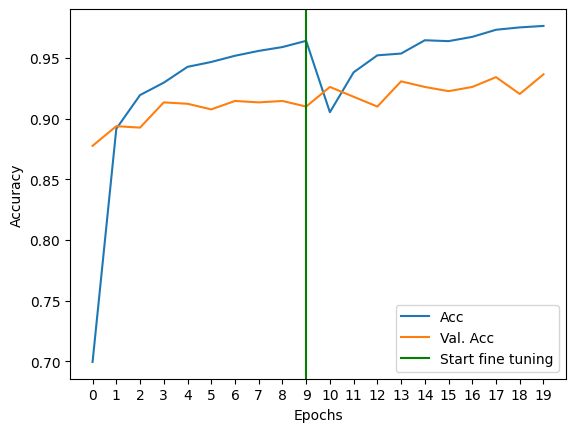

In [15]:
plt.plot(tf_history_0.history["accuracy"]+tf_history_1.history["accuracy"])
plt.plot(tf_history_0.history["val_accuracy"]+tf_history_1.history["val_accuracy"])
plt.xticks(range(len(tf_history_0.history["accuracy"]+tf_history_1.history["accuracy"])))
plt.axvline(9, color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Acc", "Val. Acc", "Start fine tuning"])
plt.show()

Overall the resulting performance of the model is quite close to published results on the Caltach 101, e.g. this [paper](https://arxiv.org/abs/1406.4729v1), while the definintion and training of the model only required very little code.

In order to evaluate if transfer learning actually makes a difference, we can simply train the MobileNetV2 on the Caltech 101 data set. As we already discussed, training such a high capacity model on such a small data set leads to heavy overfitting.

In [17]:
""" Instantiate a new base_model, now with randomly initialized weights, and instantiate a new MyTransferModel object. Compile it with a RMSprop optimizer, a suitable loss and accuracy as a metric.  """

tf_batch_size = 32
tf_epochs = 5
tf_learning_rate = 0.001
base_model = base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False, weights=None) # Instantiate a randomly initialized MobileNetV2 without it's top/output layer
tf_mdl = tf_mdl = MyTransferModel(base_model)
tf_opt = k.optimizers.RMSprop(tf_learning_rate)
tf_mdl.compile(loss="sparse_categorical_crossentropy", optimizer=tf_opt, metrics=["accuracy"])
tf_mdl.build((tf_batch_size, 224, 224, 3))
tf_mdl.summary()

""" Train this newly instantiated model on the Caltech101 data set. Hint: Again use steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size) as well as a suitable number of validation_steps. """

tf_history_2 = tf_mdl.fit(train_gen, validation_data=val_gen, steps_per_epoch=int((1.0-val_split)*N_samples_Caltech101/tf_batch_size), validation_steps=int(val_split*N_samples_Caltech101/tf_batch_size), epochs=tf_epochs)

Model: "my_transfer_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   multiple                 0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  130662    
                                                                 
Total params: 2,388,646
Trainable params: 2,354,534
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/5
257/257 [=============

As you can see, training MobileNetV2 from scratch does not only suffer from severe overfitting but is also rather slow when compared with fine tuning. So overall it is recommended to use pretrained models and transfer learning if you want to train a high capacity neural network on a small data set, as it is often the case in practical applications. By doing this you can benefit from not only the architecture search of many experts but also save time and computational resources since a part of your model has already be pretrained by someone else. But you should always keep in mind that transfer learning is only a suitable method if there is a realistic chance of a positive transfer, i.e. the data set and task the model was pretrained on has to have something in common with your data set and task. Otherwise transfer learning can not only slow down the convergence speed but also hurt the final performance of your model.

## Catastrophic Forgetting
In order to demonstrate catastrophic forgetting, we will train a neural network first on MNIST and then on the FashionMNIST data set. We want to be able to uniquely identify any class from both data sets. Since both data sets contain $10$ classes and use the labels $\lbrace0,\ldots,9\rbrace$ for them, we need to choose different labels for the FashionMNIST data set. We do this by loading the data set and shifting the labels by $10$ so that we get labels $\lbrace10,\ldots,19\rbrace$.

In [23]:
""" Shift the labels of the FashionMNIST data set to {10,...,19}. """

(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()

x_train_fmnist = np.expand_dims(x_train_fmnist, axis=-1).astype(np.float32)
y_train_fmnist = y_train_fmnist + 10 # Shift labels of training data
x_test_fmnist = np.expand_dims(x_test_fmnist, axis=-1).astype(np.float32)
y_test_fmnist = y_test_fmnist+10 # Shift labels of testing data

We also plot some examples of this data set and varify if the labels were shifted correctly.

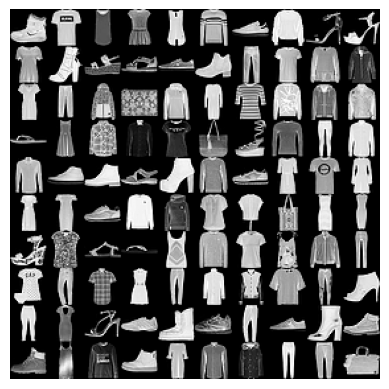

Labels
MNIST: [0 1 2 3 4 5 6 7 8 9]
FashionMNIST: [10 11 12 13 14 15 16 17 18 19]


In [24]:
plt_img = np.zeros((280, 280))
for i in range(10):
  for j in range(10):
    plt_img[i*28:(i+1)*28, j*28:(j+1)*28] = np.squeeze(x_train_fmnist[i*10+j])
plt.imshow(plt_img, cmap="gray")
plt.axis("off")
plt.show()

print("Labels")
print("MNIST: "+str(np.unique(y_test_mnist)))
print("FashionMNIST: "+str(np.unique(y_test_fmnist)))

Now the data is prepared we need to define a new model that can classify images into $20$ different classes. This is necessary since the models we used up to this point only have $10$ neurons in their output layers and therefore are only capable of classifying into $10$ different categories.

In [35]:
""" Implement a new model, which is capable of classifying 20 classes. Use two conv. layers with 8/16 filters of size 3x3 and a stride of 2, a dropout layer between the conv. and dense layers with a droprate of 0.25
three dense layers with 128/64/? neurons. Choose all activation functions appropriately."""

class MyExtendedModel(k.Model):
    def __init__(self):
        super(MyExtendedModel, self).__init__()
        # Layer definition
        self.conv0 = k.layers.Conv2D(8, 3,2, activation="relu")
        self.conv1 = k.layers.Conv2D(16, 3,2, activation="relu")
        self.flatten = k.layers.Flatten()
        self.dropout = k.layers.Dropout(0.25)
        self.dense0 = k.layers.Dense(128, activation="relu")
        self.dense1 = k.layers.Dense(64, activation="relu")
        self.dense2 = k.layers.Dense(20, activation="softmax")


    def call(self, inputs, training=False):
        # Call layers in correct order to implement forward pass
        output = self.conv0(inputs)
        output = self.conv1(output)
        output = self.flatten(output)
        output = self.dropout(output, training)
        output = self.dense0(output)
        output = self.dense1(output)
        output = self.dense2(output)
        return output

With this model we are almost redy to start training on a sequence of tasks, i.e. we will first train on the MNIST data set in order to learn the classes $0$ up to $9$ and after that train on the FshionMNIST data set in order to learn the remaining classes from $10$ to $19$. During this process we want to evaluate the model separately on MNIST and FashionMNIST validation data. Since this is not a standard procedure, we need to implement a Callback class. Callbacks in Keras are used to implement actions that are executed at different points during the training process, e.g. at the beginning of the training, after a batch is processed or at the end of each epoch. See the [documentation](https://www.tensorflow.org/versions/r2.2/api_docs/python/tf/keras/callbacks) for an overview of all provided callbacks and the [guide](https://www.tensorflow.org/beta/guide/keras/custom_callback#an_overview_of_callback_methods) on writing custom callbacks. While there are predefined callbacks, e.g. for logging metrics into a tensorboard log file, there is unfortunately no callback that we could use to evaluate our model simultaneously on two different validation data sets. The only option we have is to implement our own callback.

In [36]:
""" Implement a custom callback that evaluates a model on two data sets at the end of an epoch and stores the results in a two separate lists. Hint: The Keras callback class always posses an assotiated model. You can
use it via the "self.model" attribute of the class. Hint: Evaluating the model will return a tuple containing two elements, i.e. (loss, acc).  """

class MyCallback(tf.keras.callbacks.Callback):
  # Get the two different data sets and create lists for storing results
  def __init__(self, x_0, y_0, x_1, y_1, batch_size):
    super(MyCallback, self).__init__()
    self.x_0 = x_0
    self.y_0 = y_0
    self.x_1 = x_1
    self.y_1 = y_1
    self.loss_0 = []
    self.acc_0 = []
    self.loss_1 = []
    self.acc_1 = []
    self.batch_size = batch_size

  def on_epoch_end(self, epoch, logs=None):
    # Evaluate the model on both data sets and store results
    print("\nStarting callback...")
    print("+----------------------+")
    print("| Data set 0           |")
    print("+----------------------+")
    metrics_0 = self.model.evaluate(self.x_0, self.y_0, self.batch_size) #Evaluate the model on "self.x_0" and "self.y_0" with "self.batch_size"
    self.loss_0.append(metrics_0[0]) # Append loss to the loss list "self.loss_0" and accuracy to the accuracy list "self.acc_0"
    self.acc_0.append(metrics_0[1])
    print("+----------------------+")
    print("| Data set 1           |")
    print("+----------------------+")
    metrics_1 = self.model.evaluate(self.x_1, self.y_1, self.batch_size) #Evaluate the model on "self.x_1" and "self.y_1" with "self.batch_size"
    self.loss_1.append(metrics_1[0]) # Append loss to the loss list "self.loss_1" and accuracy to the accuracy list "self.acc_1"
    self.acc_1.append(metrics_1[1])
    print("Callback completed...")

This callback will accept two data sets on its initialization that can be used during training to evaluate on. For this we override the on_epoch_end function to evaluate on both data sets, print the results and store them for later use. We now train our neural network first on MNIST in order to learn the classes $\lbrace0,\ldots,9\rbrace$ and then on FashionMNIST in order to learn the classes $\lbrace10,\ldots,19\rbrace$  while simultaneously evaluating the model on both, the MNIST and FashionMNIST test sets. If our neural network would be capable of learning continually, we would expect to see the loss on MNIST decrease as we train on it and remain low as we continue with the training on FashionMNIST. Similarly we would expect the accuracy to rise on MNIST as we train on it and remain stable even if we continue to train on FashionMNIST.

In [37]:
""" Instantiate a MyExtendedModel object, a RMSprop optimizer with learning rate "learning_rate" and compile them with a suitable loss function and accuracy as a metric. Then instantiate a MyCallback object with the
MNIST test data set "x_test_mnist", "y_test_mnist" and the FashionMNIST test data set "x_test_fmnist", "y_fmnist". Finally train the model first on the MNIST training data set and then on the FashionMNIST data set.
Hint: Use the MyCallback object "my_cb" during the training in order to record the accuracies on both data sets during training. """

extended_mdl = MyExtendedModel()
extended_opt = tf.keras.optimizers.RMSprop(learning_rate)
extended_mdl.compile(loss="sparse_categorical_crossentropy", optimizer=extended_opt, metrics=["accuracy"])

my_cb = MyCallback(x_test_mnist, y_test_mnist, x_test_fmnist, y_test_fmnist, batch_size)

extended_mdl.fit(x_train_mnist, y_train_mnist, batch_size, epochs, callbacks = [my_cb]) # Train on MNIST
extended_mdl.fit(x_train_fmnist, y_train_fmnist, batch_size, epochs, callbacks = [my_cb]) # Train on FashionMNIST

Epoch 1/20
460/469 [============================>.] - ETA: 0s - loss: 0.6735 - accuracy: 0.8628
Starting callback...
+----------------------+
| Data set 0           |
+----------------------+
79/79 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9636
+----------------------+
| Data set 1           |
+----------------------+
79/79 [==============================] - 0s 2ms/step - loss: 13.0658 - accuracy: 0.0000e+00
Callback completed...
469/469 [==============================] - 4s 5ms/step - loss: 0.6645 - accuracy: 0.8643
Epoch 2/20
463/469 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9546
Starting callback...
+----------------------+
| Data set 0           |
+----------------------+
79/79 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9748
+----------------------+
| Data set 1           |
+----------------------+
79/79 [==============================] - 0s 3ms/step - loss: 10.7614 - accuracy: 0.0000e+

If we now plot the loss on the test sets during the sequential training process on MNIST and FashionMNIST, we can clearly see what catastrophic forgetting means.

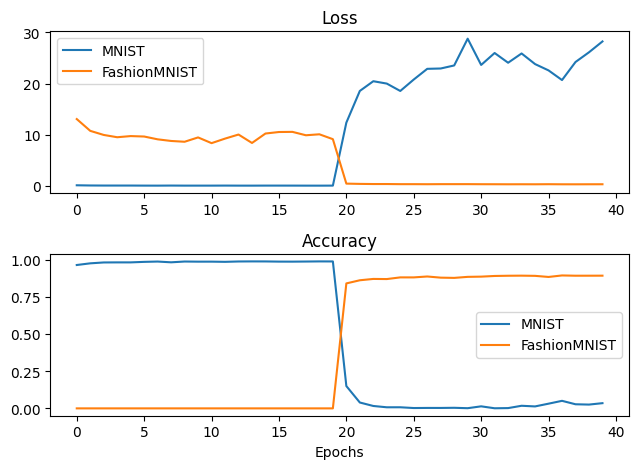

In [38]:
plt.subplot(2, 1, 1)
plt.plot(my_cb.loss_0)
plt.plot(my_cb.loss_1)
plt.legend(["MNIST", "FashionMNIST"])
plt.title("Loss")
plt.subplot(2, 1, 2)
plt.plot(my_cb.acc_0)
plt.plot(my_cb.acc_1)
plt.legend(["MNIST", "FashionMNIST"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()
plt.show()

We can clearly see the transition from training on MNIST to training on FashionMNITS on epoch $20$. At this epoch the loss on MNIST rapidly increases again while the loss on FashionMNIST rapidly decreases. For the accuracy we see a similar but opposite behaivior. It first is high while training on MNIST and then rapidly decreases towards $0$ as we transition to training on FashionMNIST. Avioding this phenomenon is an active area of research on deep learning and there already exist some methods in order to mitigate catastrophic forgetting. But so far solving continual learning with neural networks remains an interesting and challenging problem. If it can be solved, neural networks could learn more human like without a constant need to refresh previously learned examples and enable interesting new applications where knowledge is accumulated over time.

## Conclusion
In this exercise we have learned how to use Keras in order to quickly develop neural networks and train them on different data sets. We also refreshed the mathematical background on classification and explored how dropout can act as an effective regularization in order to mitigate overfitting. While the Keras specification offers a high-level of abstraction in order to simplify build and training neural networks, it also enables us to customize some parts of the complete workflow. In order to evaluate a model on two different data sets in order to visualize the phenomenon of catastrophic forgetting, we implemented a custom callback that executed our required action at the end of every epoch. Besides that Keras offers many other ways to implement non standard layers/methods. If you want to learn more on Keras, you can visit the documentation on the Keras implementation in Tensorflow [here](https://www.tensorflow.org/versions/r2.2/api_docs/python/tf/keras) or directly use the Keras specification available [here](https://keras.io). Additionally we explored a very basic transfer learning technique, i.e. fine tuning of pretrained models. For this we utilized the MobileNetV2 architecture that was trained on the ImageNet data set and fine tuned it on the Caltech 101 data set. The resulting model was simple to implement and fast to train, while it still achieved competetive results.